In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

data_list = []

for f_name in sorted(glob.glob("../entropia/fashion-test-on-FMNIST-MNIST/ll_per_point_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion*")):
# for f_name in sorted(glob.glob("../entropia/fashion-test-on-FMNIST-MNIST/ll_per_point_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist*")):
    data = pd.read_csv(f_name, header=None, sep=" ")
#     print(f_name)
    if len(data) == 1000000:
        grouped = data.groupby([0], as_index=False).mean()
        data_list.append((data, grouped))

In [2]:
def calculate_coeff(data, min_i, max_i, log=False, plot=False, show=True):
    data = np.array(data)
    data_clean = data[np.all(~np.isnan(data), axis=1)]
    ind_sort = np.argsort(data_clean[:,0])
    data_clean = data_clean[ind_sort]
    d, ll = tuple(zip(*data_clean))

    d = d[min_i:max_i]
    ll = ll[min_i:max_i]

    d = np.array(d).reshape(-1,1)
    ll = np.array(ll)
    
    if log:
        d = np.log(d)

    regr = linear_model.LinearRegression()
    regr.fit(d, ll)
    ll_pred = regr.predict(d)

    if plot:
        plt.plot(d, regr.predict(d), label="prediction", c='r', alpha=0.5)
        plt.plot(d, ll, 'o-', alpha=0.5)
    if show:
        plt.show()
        
    return regr.coef_[0]

In [6]:
img_size = 32
channels = 1
n_pixel = (img_size ** 2) * channels
max_items = 100

# plt.figure(figsize=(10,10))

dims = []
classes = []

for n in range(max_items):
    if n % 100 == 0:
        print(n)
    for i in range(100):
        to_plot = []
        for j in range(len(data_list)):
            data = data_list[j][0]
            data = data[data[0] == n]
            line = data.iloc[i]
            to_plot.append([line[1], -(line[2] + line[3])])
        to_plot = np.array(to_plot)        
        dims.append(n_pixel - calculate_coeff(to_plot, 0, len(to_plot), log=True, plot=False, show=False))
    #     dims.append(n_pixel - calculate_coeff(to_plot, 0, len(to_plot), log=True, plot=True, show=False))
        classes.append(n)

0


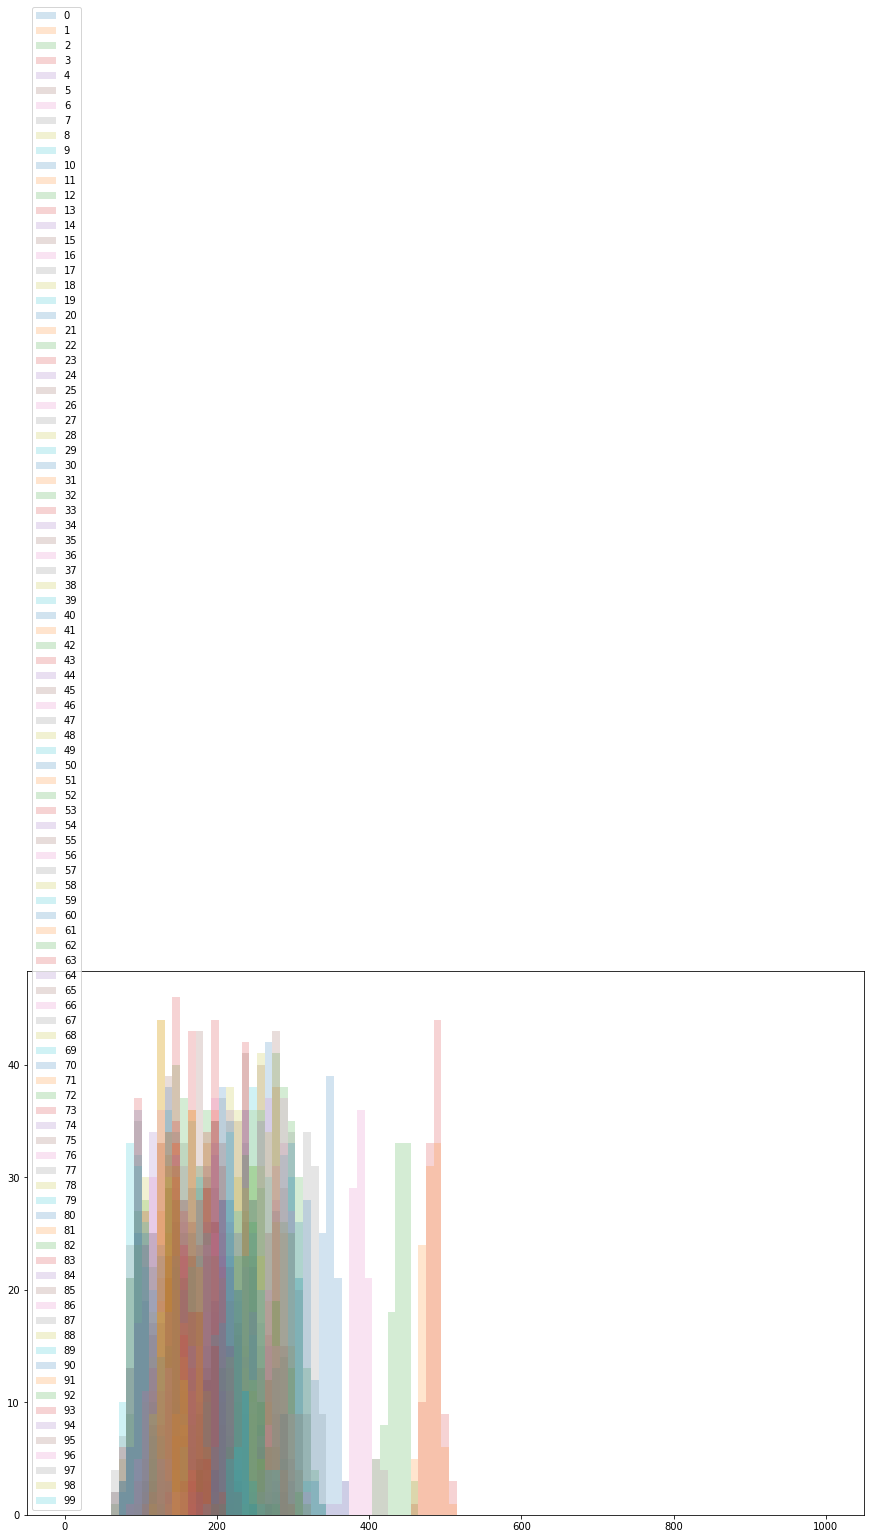

In [7]:
dims = np.array(dims)
classes = np.array(classes)
plt.figure(figsize=(15,10))
for i in range(max_items):
#     print(np.mean(dims[classes==i]))
    plt.hist(dims[classes==i], alpha=0.2, label=str(i), bins = np.linspace(0, 1000, 100))
plt.legend();